# EDA & Feature Engineering

## Library & Data Imports

In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')

from bg_functions import *

In [2]:
data = pd.read_csv('formatted_data.csv', index_col=0)
data.head()

,name,year_published,min_players,max_players,playing_time,min_play_time,max_play_time,min_age,users_rated,average_rating,...,mechanic_storytelling,mechanic_take_that,mechanic_tile_placement,mechanic_time_track,mechanic_trading,mechanic_trick-taking,mechanic_variable_phase_order,mechanic_variable_player_powers,mechanic_voting,mechanic_worker_placement
0,"Warhammer 40,000: Heroes of Black Reach",2018.0,2.0,2.0,120.0,30.0,120.0,14.0,11,7.63636,...,0,0,0,0,0,0,0,0,0,0
1,The Russo-Georgian War of 2008,2010.0,1.0,2.0,90.0,90.0,90.0,12.0,9,7.22222,...,0,0,0,0,0,0,0,0,0,0
2,Frher oder Spter,2009.0,2.0,5.0,30.0,30.0,30.0,8.0,2,4.50000,...,0,0,0,0,0,0,0,0,0,0
5,Wings Over France,1992.0,1.0,1.0,60.0,60.0,60.0,10.0,50,7.50000,...,0,0,0,0,0,0,0,0,0,0
9,Mothra vs. Godzilla,1982.0,2.0,2.0,90.0,90.0,90.0,10.0,7,6.98143,...,0,0,0,0,0,0,0,0,0,0


### Category & Mechanic Feature Combination
To start with, in an attempt to reduce some of my dimensionality, as well as reduce some of the extraneous categories and possibly mechanics, I'm going to go through and combine all of the War-related categories into Wargames, and investigate other possible combinations of both categories and mechanics.

In [3]:
war_cats = [col for col in data.columns if 'war' in col]
war_cats

['category_american_civil_war',
 'category_american_indian_wars',
 'category_american_revolutionary_war',
 'category_civil_war',
 'category_korean_war',
 'category_modern_warfare',
 'category_vietnam_war',
 'category_wargame',
 'category_world_war_i',
 'category_world_war_ii']

In [4]:
category_combine(data, columns=war_cats, final_column='category_wargame')

Next I want to combine Educational categories, though this is a little bit more nebulous, as some of these may not necessarily be aimed at education, but I'll include anything specifically related to something that's learned in school, such as math, science, and even economics. I will also include the children's game category in this, as most children's games have at least some educational parts to them.

In [5]:
categories = data[[col for col in data.columns if 'category' in col]]
list(categories.columns)

['category_abstract_strategy',
 'category_action_/_dexterity',
 'category_adventure',
 'category_age_of_reason',
 'category_american_west',
 'category_ancient',
 'category_animals',
 'category_arabian',
 'category_aviation_/_flight',
 'category_bluffing',
 'category_book',
 'category_card_game',
 "category_children's_game",
 'category_city_building',
 'category_civilization',
 'category_collectible_components',
 'category_comic_book_/_strip',
 'category_deduction',
 'category_dice',
 'category_economic',
 'category_educational',
 'category_electronic',
 'category_environmental',
 'category_expansion_for_base-game',
 'category_exploration',
 'category_fan_expansion',
 'category_fantasy',
 'category_farming',
 'category_fighting',
 'category_game_system',
 'category_horror',
 'category_humor',
 'category_industry_/_manufacturing',
 'category_mafia',
 'category_math',
 'category_mature_/_adult',
 'category_maze',
 'category_medical',
 'category_medieval',
 'category_memory',
 'category_mi

In [6]:
educational_cats = ["category_children's_game", 'category_economic',
                    'category_math', 'category_memory', 'category_number',
                    'category_puzzle', 'category_word_game']

In [7]:
category_combine(data, columns=educational_cats,
                 final_column='category_educational')

Next I want to combine historical timeframe and locational categories, like American West, Medieval, and Napoleonic. While some of these may have vastly different mechanics amongst them, I believe those differences will be covered by the mechanics features.

In [8]:
historical_cats = ['category_age_of_reason', 'category_american_west',
                   'category_ancient', 'category_arabian', 'category_medieval',
                   'category_napoleonic', 'category_post-napoleonic',
                   'category_prehistoric', 'category_renaissance']

In [9]:
data['category_historical'] = 0
category_combine(data, columns=historical_cats,
                 final_column='category_historical')

Next, I want to combine categories based around (pop) culture themes, like comic book/strip, video games, and movies. A couple of the categories I'll be including in this set may be a little bit of a stretch, but they each have their own cultures surrounding them, which is why they'll be included.

In [10]:
culture_cats = ['category_book', 'category_comic_book_/_strip',
                'category_fantasy', 'category_horror', 'category_humor',
                'category_mafia', 'category_movies_/_tv_/_radio_theme',
                'category_murder/mystery', 'category_music',
                'category_mythology', 'category_pirates', 'category_religious',
                'category_science_fiction', 'category_space_exploration',
                'category_spies/secret_agents', 'category_sports',
                'category_video_game_theme']

In [11]:
data['category_culture'] = 0
category_combine(data, columns=culture_cats,
                 final_column='category_culture')

Finally, I want to combine categories related to transportation.

In [12]:
transportation_cats = ['category_aviation_/_flight', 'category_nautical',
                       'category_racing', 'category_trains']

In [13]:
category_combine(data, columns=transportation_cats,
                 final_column='category_transportation')

For Mechanics, for the most part each mechanic is in its own category, however, there's one supergroup that I want to combine, and that's Movement-based mechanics.

In [14]:
movement_mechs = ['mechanic_action_/_movement_programming',
                  'mechanic_area_movement', 'mechanic_crayon_rail_system',
                  'mechanic_grid_movement', 'mechanic_point_to_point_movement',
                  'mechanic_roll_/_spin_and_move',
                  'mechanic_route/network_building']

In [15]:
data['mechanic_movement'] = 0
category_combine(data, columns=movement_mechs,
                 final_column='mechanic_movement')

### Further Feature Reduction & Adjustment
Upon further inspection of the dataset and BoardGameGeek, it looks like playing_time is always equal to max_play_time, so I will drop playing_time. I'm also dropping users_rated, total_owners, and total_weights, and will fill the blank average weights with the best option of mean, median, or mode.

In [16]:
data.drop(columns=['playing_time', 'users_rated', 'total_owners', 'total_weights'], inplace=True)

In [17]:
data.average_weight.replace(0, np.nan, inplace=True)
print('Mean:', data.average_weight.mean())
print('Median:', data.average_weight.median())
print('Mode:', data.average_weight.mode())

Mean: 1.9125199775906971
Median: 2.0
Mode: 0    1.0
dtype: float64


In [18]:
data.average_weight.fillna(data.average_weight.mean(), inplace=True)

### EDA

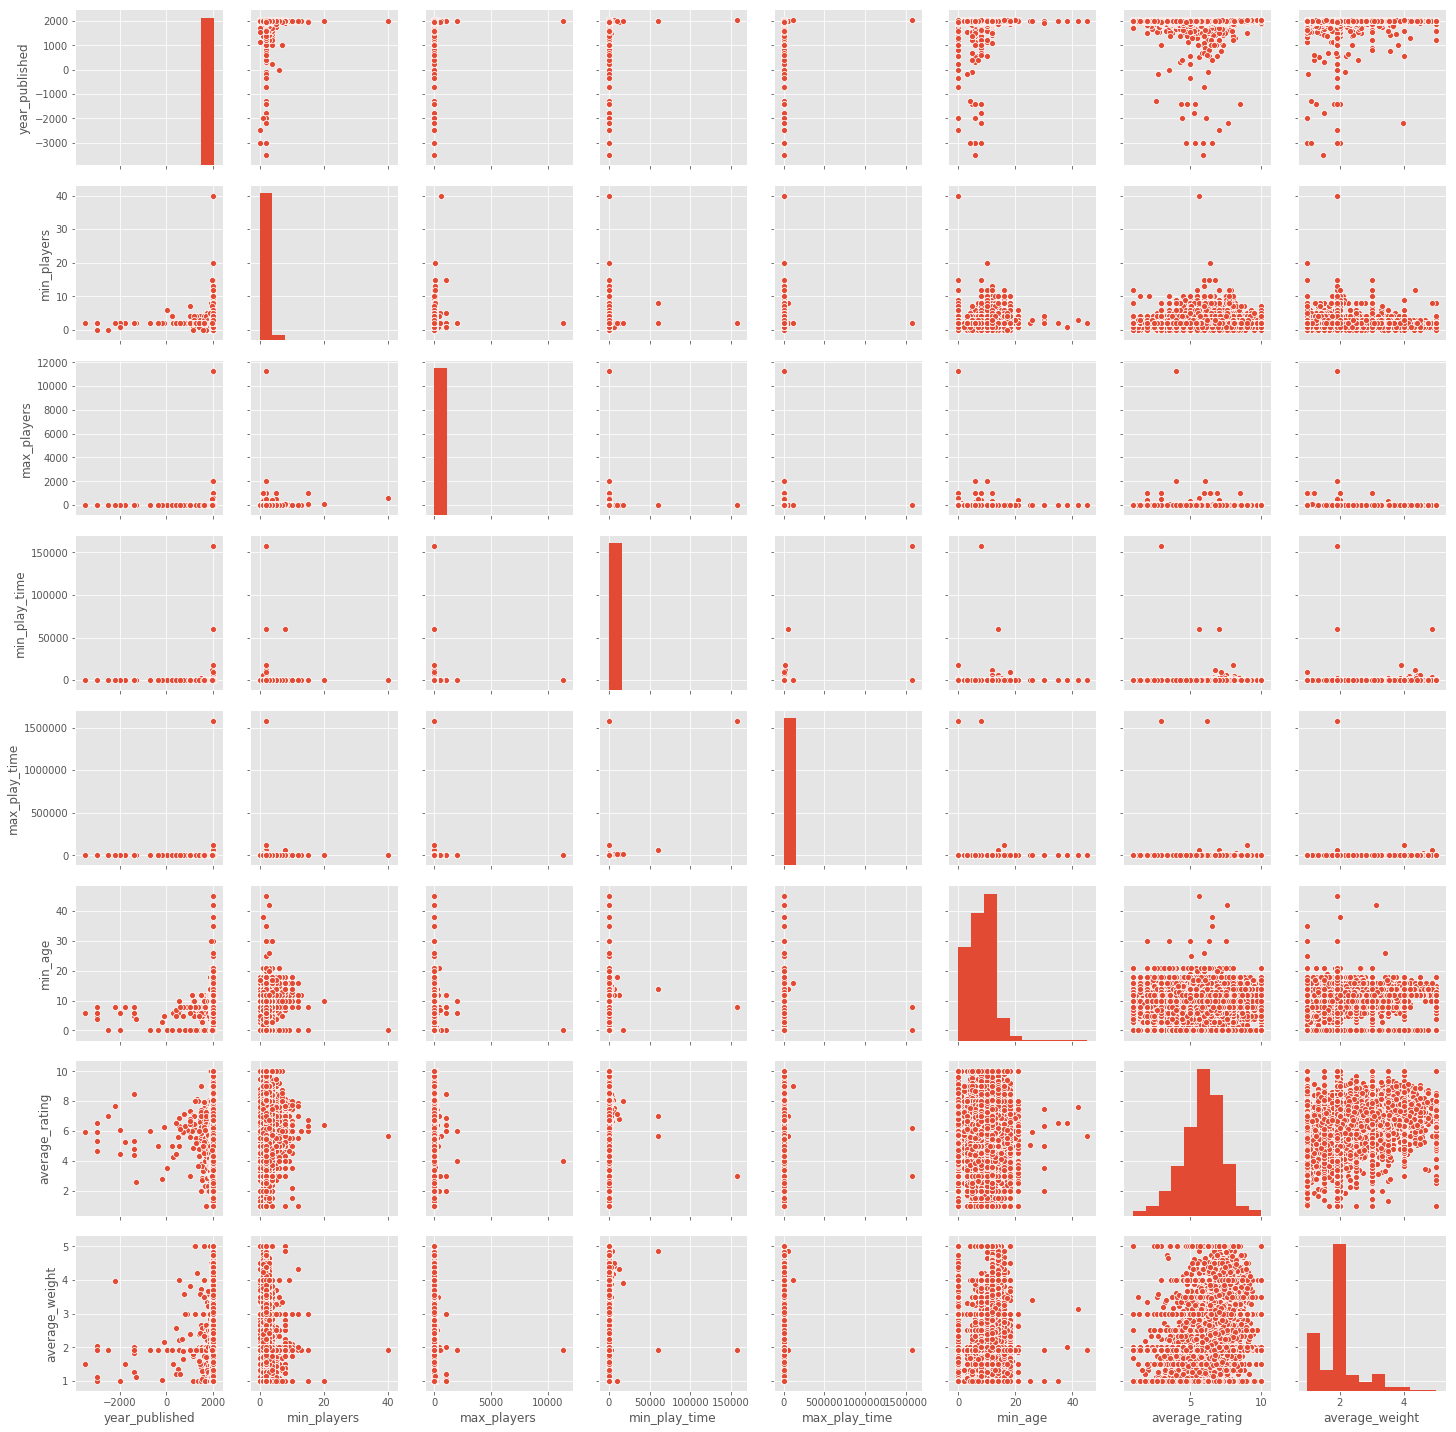

In [19]:
base_features = data[['year_published', 'min_players',  'max_players',
                      'min_play_time', 'max_play_time', 'min_age',
                      'average_rating', 'average_weight']]
sns.pairplot(base_features)

In [20]:
categories = data[[col for col in data.columns if 'category' in col]]

In [21]:
mechanics = data[[col for col in data.columns if 'mechanic' in col]]

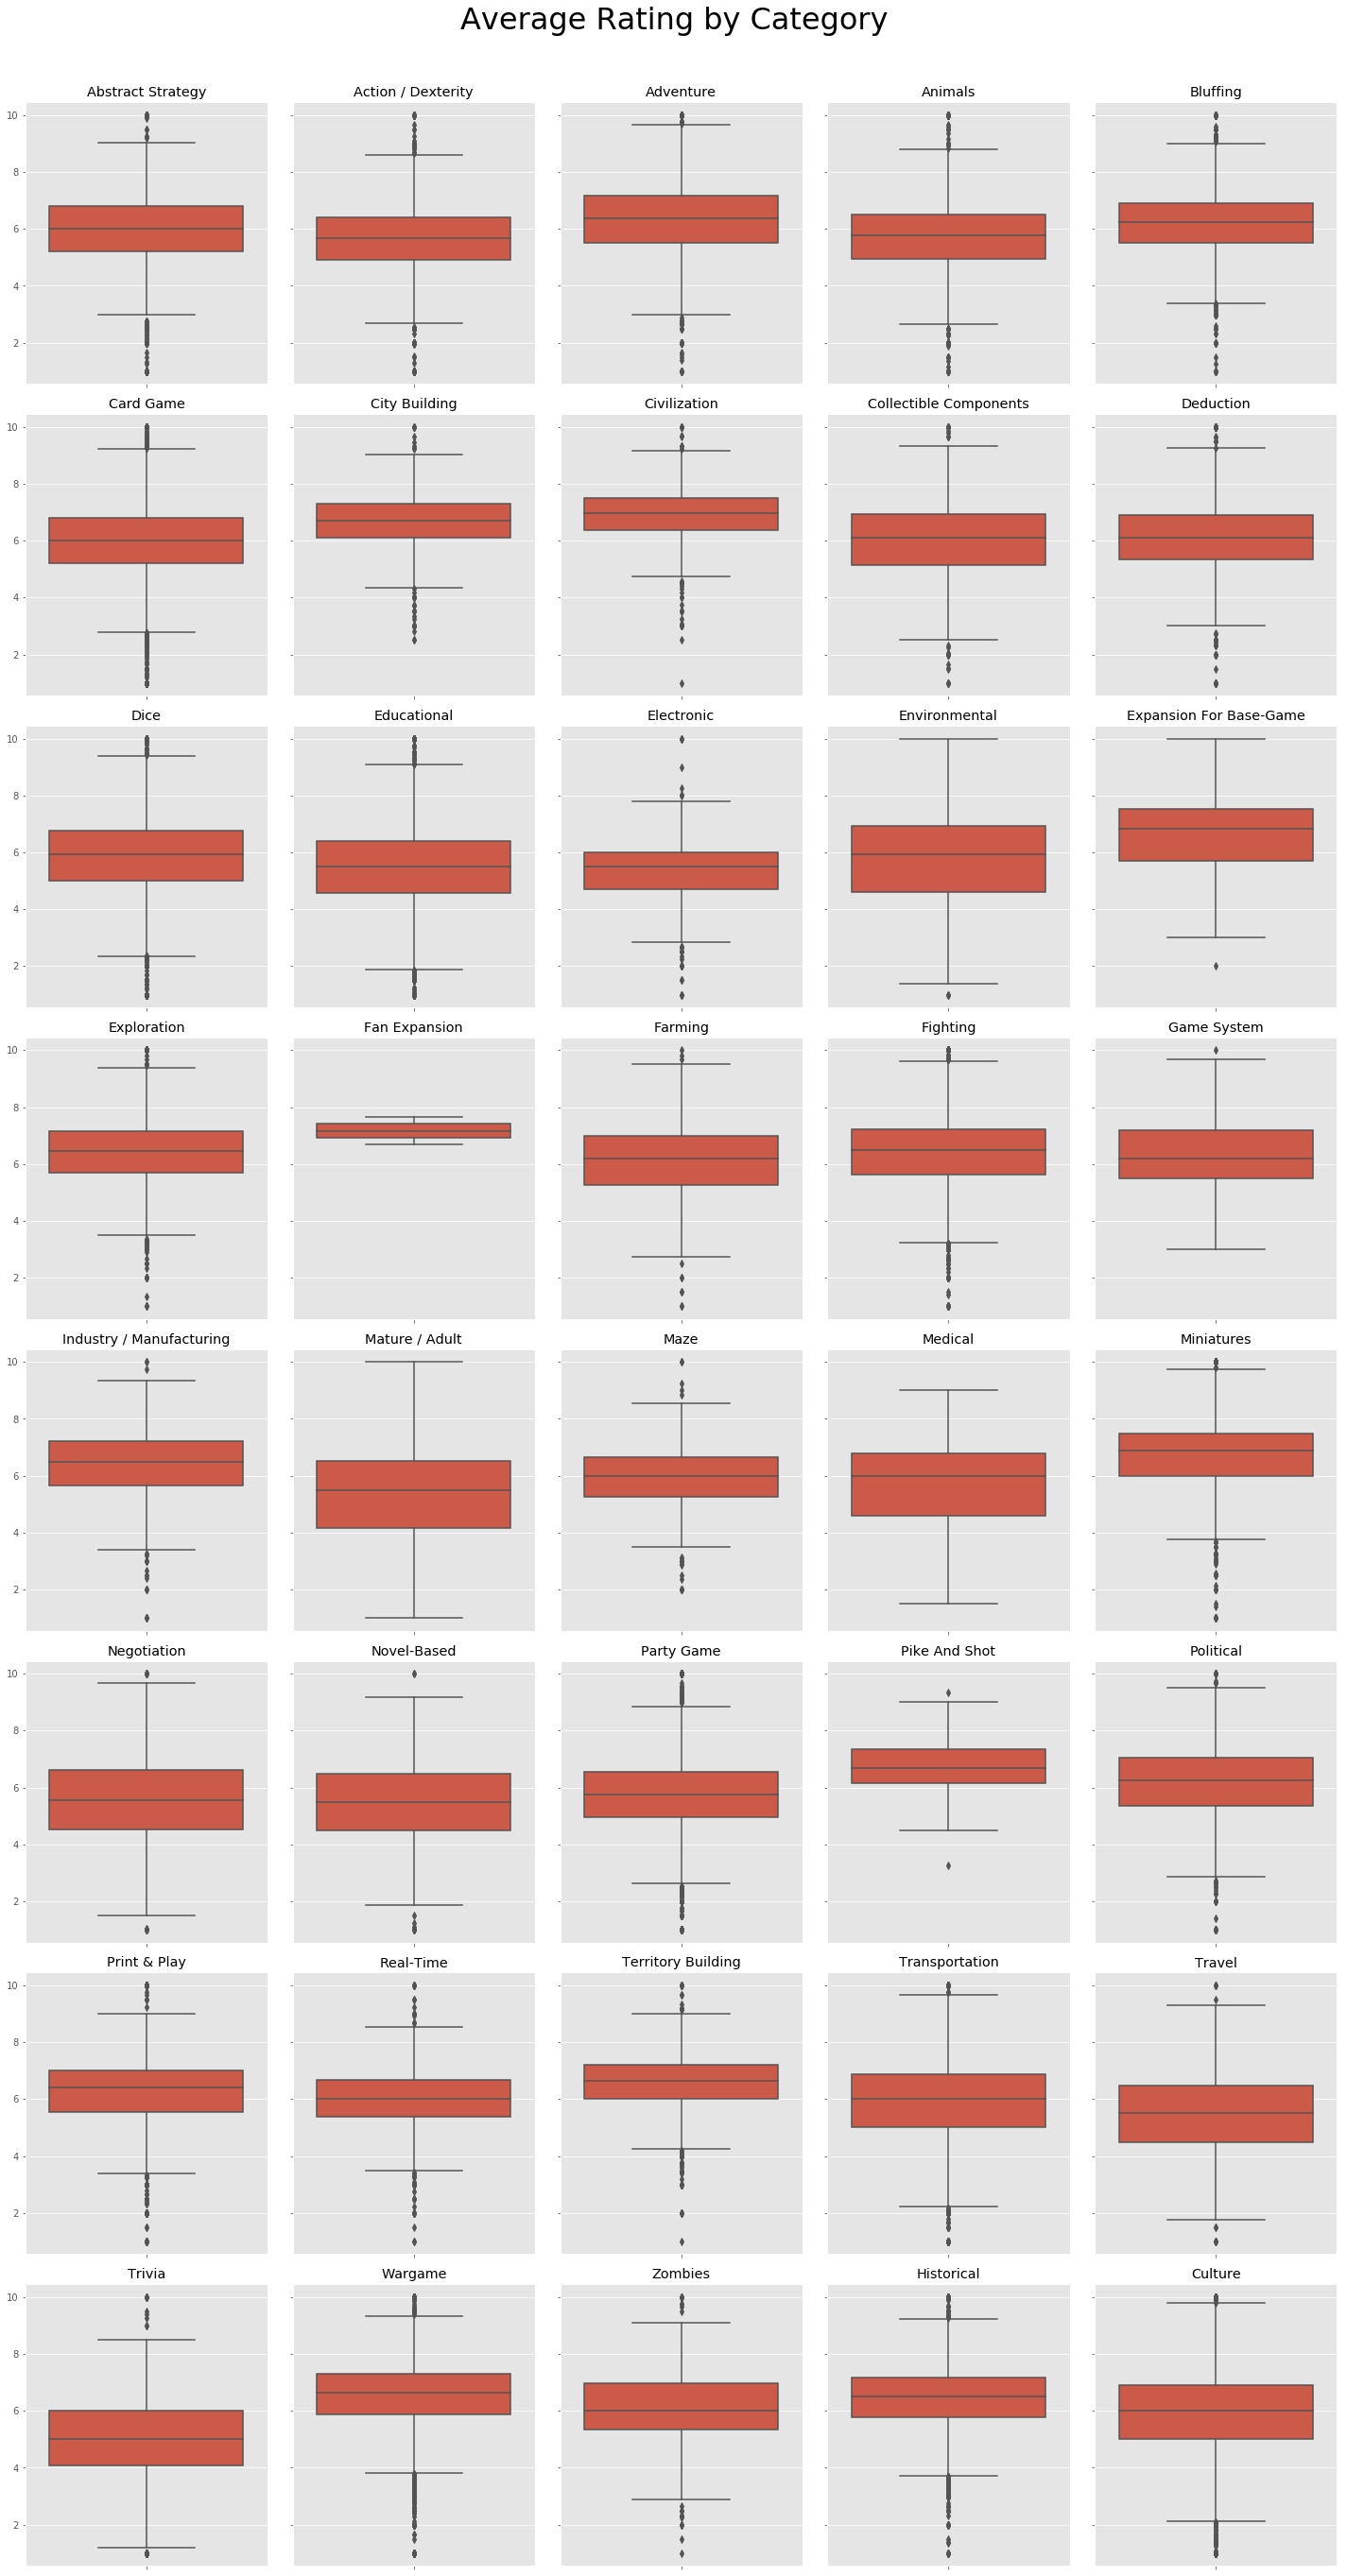

In [22]:
fig, axes = plt.subplots(ncols=5, nrows=8, figsize=(20, 40), sharey=True)
fig.suptitle('Average Rating by Category', fontsize=32)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

for ax, col in zip(axes.flatten(), categories.columns):
    sns.boxplot(data.loc[data[col] == 1, 'average_rating'], ax=ax, orient='v')
    ax.set(title=col[9:].title().replace('_', ' '), ylabel='')

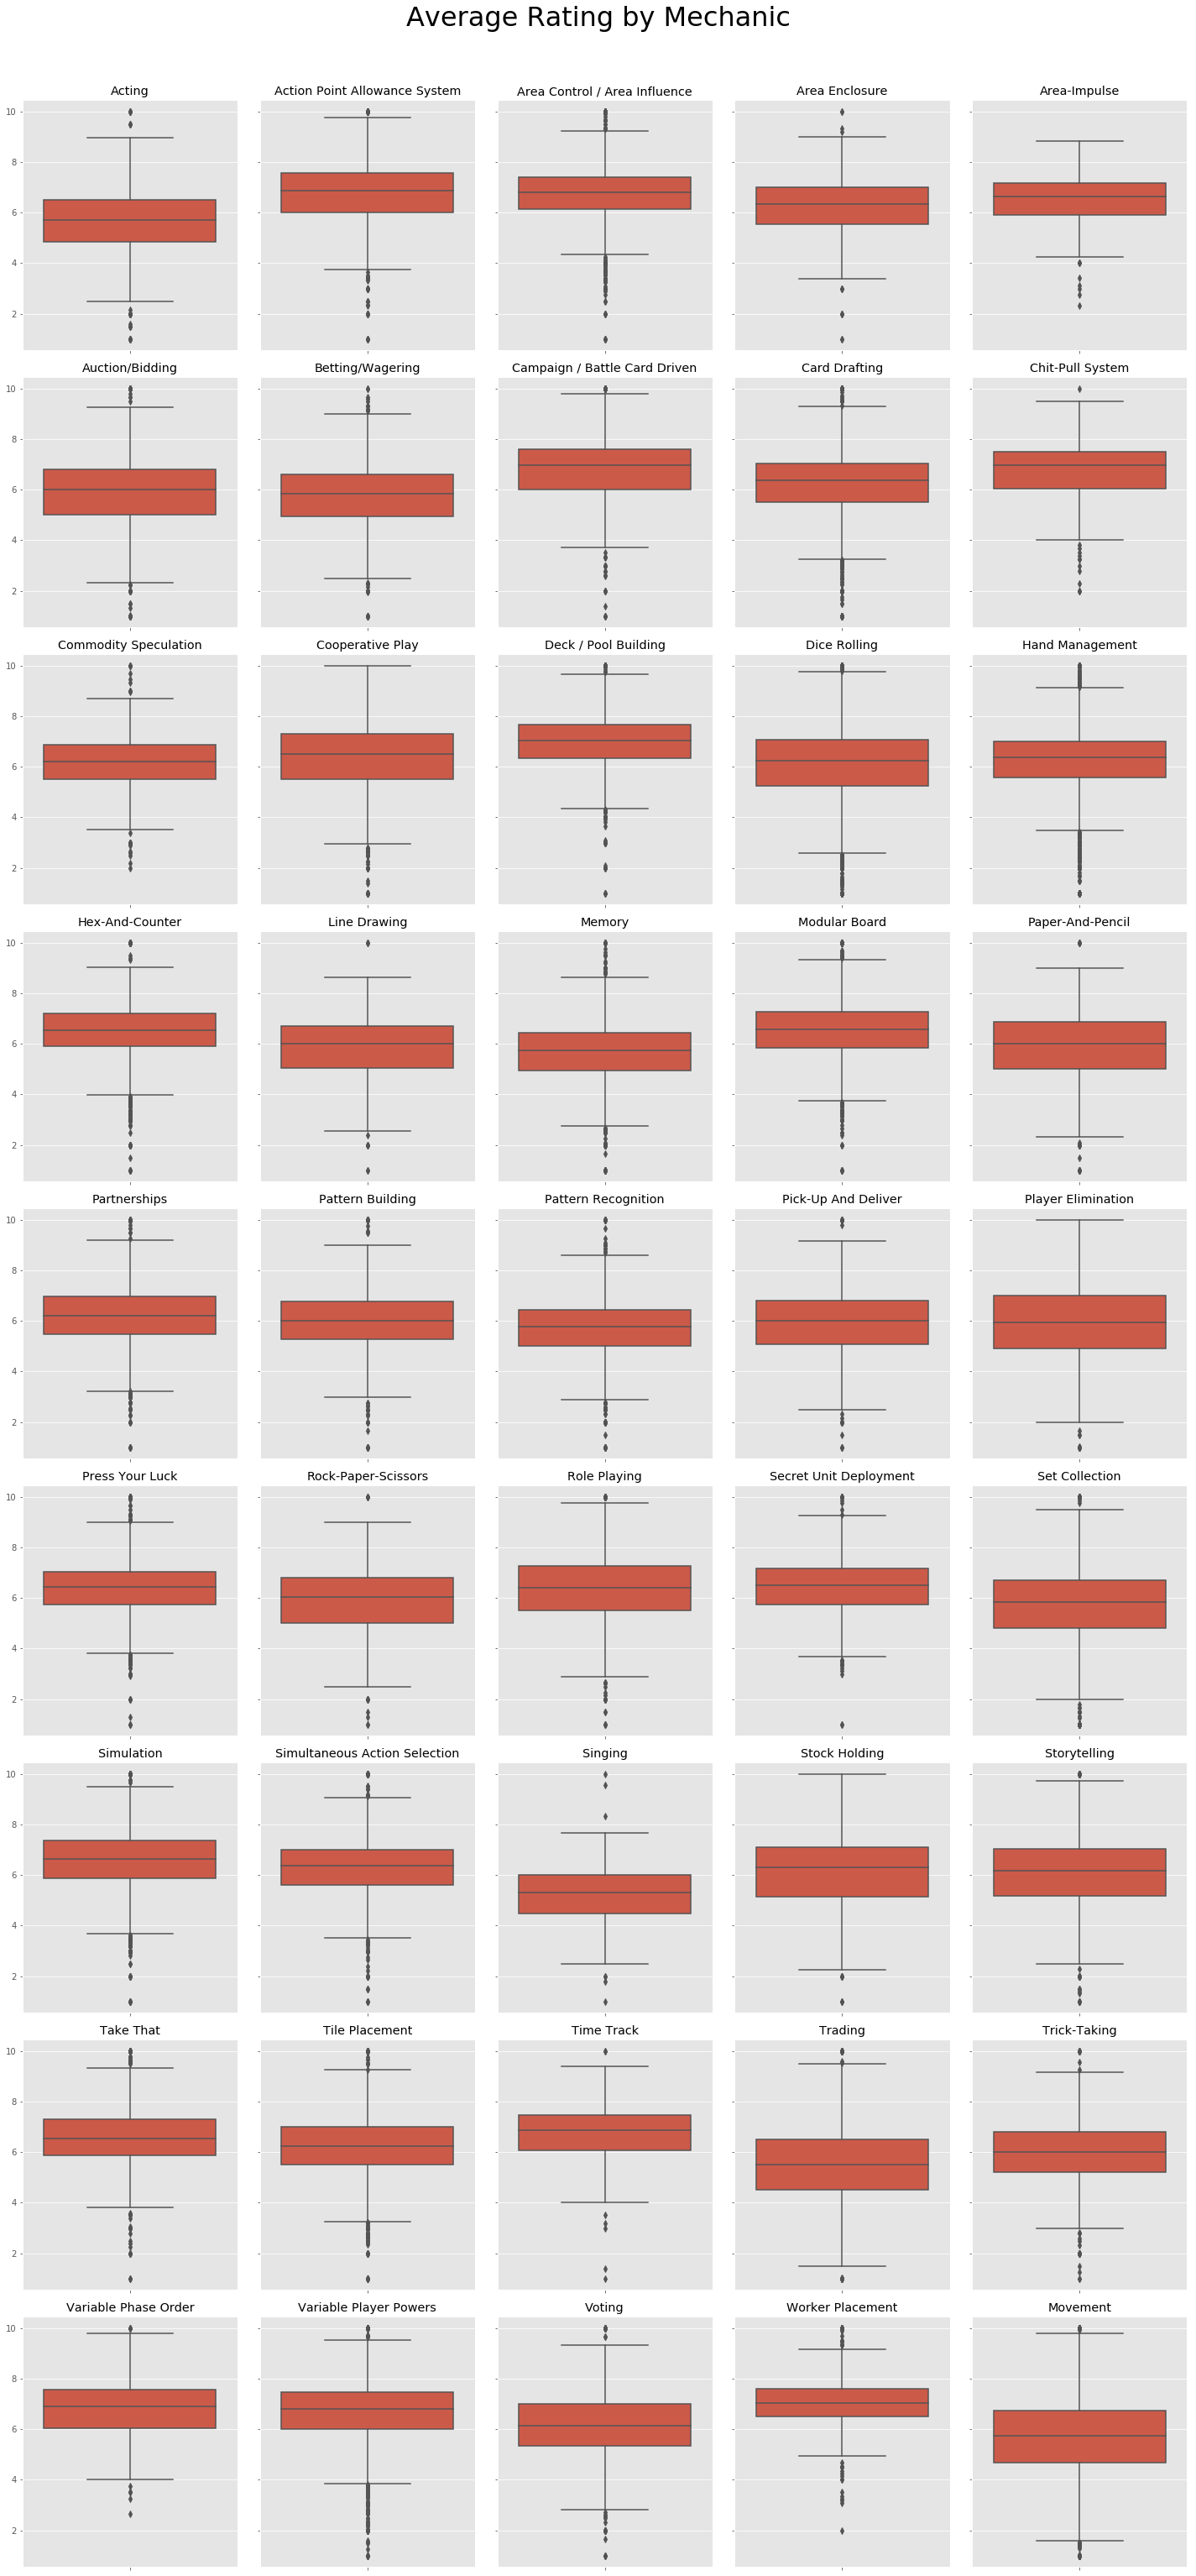

In [23]:
fig, axes = plt.subplots(ncols=5, nrows=9, figsize=(20, 45), sharey=True)
fig.suptitle('Average Rating by Mechanic', fontsize=32)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

for ax, col in zip(axes.flatten(), mechanics.columns):
    sns.boxplot(data.loc[data[col] == 1, 'average_rating'], ax=ax, orient='v')
    ax.set(title=col[9:].title().replace('_', ' '), ylabel='')

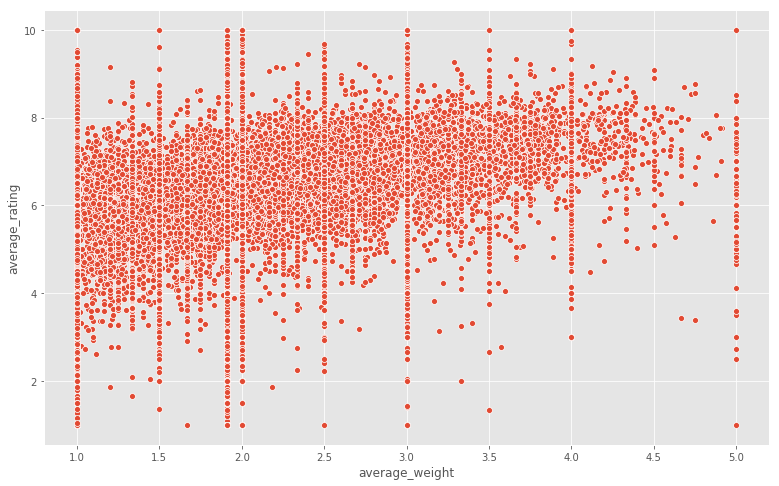

In [30]:
plt.figure(figsize=(13, 8))
sns.scatterplot(x=data['average_weight'], y=data['average_rating'])

In [27]:
data.to_csv('final_data.csv')